In [24]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from landaupy import landau
from scipy.optimize import curve_fit

import analysis_data

In [71]:
# df.filter_fix[  df.file_tag=='20241011_965mV_900mv_100ns_attenuator_9DB']
# cuts = df.dynode_fix/df.filter_fix < 0.96
# df.file_tag[cuts]
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# from landaupy import landau
# from scipy.optimize import curve_fit

import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20240924.h5py'
df_0924 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241011_202401012_combined.h5py'
df_1012 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241014.h5py'
df_1014 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241014_intensity_1.h5py'
df_1014_1 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241017_intensity.h5py'
df_1017 = pd.read_hdf(df_path, key='winfo')

/tmp/ipykernel_3614819/2494691778.py:28: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(000, 3e6)
/tmp/ipykernel_3614819/2494691778.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(00, 3e6)


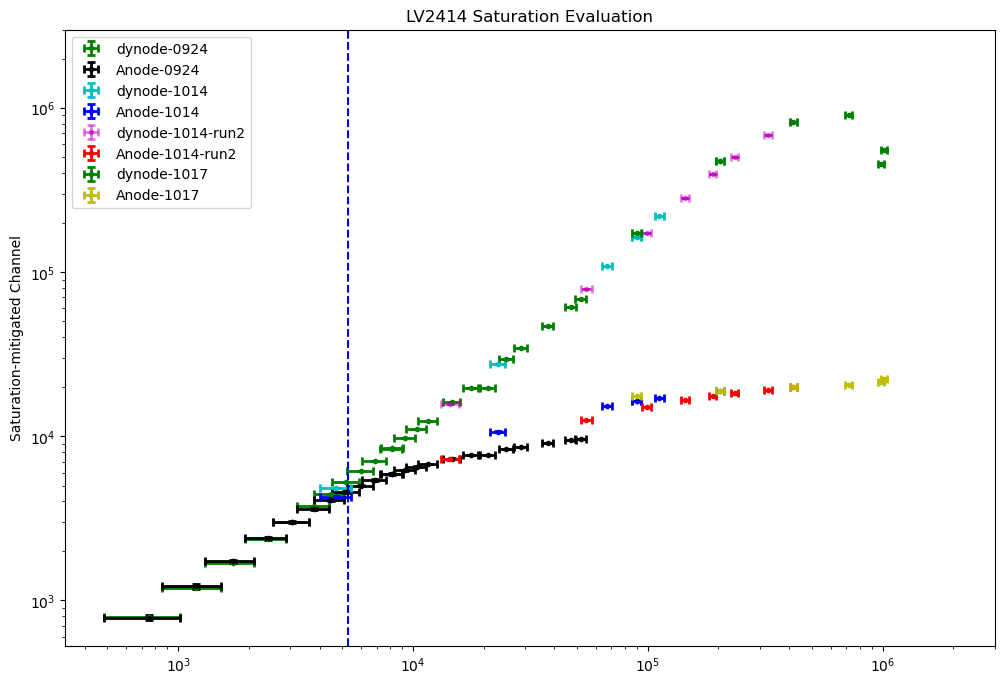

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_0924.filter_fix, df_0924.dynode_fix, xerr=df_0924.filter_fix_err, yerr=df_0924.yerr_dynode_fix, fmt='.', ecolor='g', mfc='g', mec='g',  capsize=3, elinewidth=2, capthick=2, label='dynode-0924')
ax.errorbar(df_0924.filter_fix , df_0924.Ch0_Area_mu, xerr=df_0924.filter_fix_err, yerr=df_0924.Ch0_Area_sigma,  fmt='.', ecolor='black', mfc='black', mec='black',  capsize=3, elinewidth=2, capthick=2, label='Anode-0924')
#ax.errorbar(df_1012.filter_fix, df_1012.dynode_fix, xerr=df_1012.filter_fix_err, yerr=df_1012.yerr_dynode_fix, fmt='.', ecolor='blue', capsize=3, elinewidth=2, capthick=2, label='dynode-1012')
#ax.errorbar(df_1012.filter_fix , df_1012.Ch0_Area_mu, xerr=df_1012.filter_fix_err, yerr=df_1012.Ch0_Area_sigma,  fmt='.', ecolor='red', capsize=3, elinewidth=2, capthick=2, label='Anode-1012')
ax.errorbar(df_1014.filter_fix, df_1014_1.dynode_fix, xerr=df_1014.filter_fix_err, yerr=df_1014.yerr_dynode_fix, fmt='.', ecolor='c', mfc='c',mec='c',   alpha=1, capsize=3, elinewidth=2, capthick=2, label='dynode-1014')
ax.errorbar(df_1014.filter_fix , df_1014.Ch0_Area_mu, xerr=df_1014.filter_fix_err, yerr=df_1014.Ch0_Area_sigma,  fmt='.', ecolor='b', mfc='b', mec='b',  capsize=3, elinewidth=2, capthick=2, label='Anode-1014')
ax.errorbar(df_1014_1.filter_fix, df_1014_1.dynode_fix, xerr=df_1014_1.filter_fix_err, yerr=df_1014_1.yerr_dynode_fix, fmt='.', ecolor='m', mfc='m', mec='m',   alpha=0.5,  capsize=3, elinewidth=2, capthick=2, label='dynode-1014-run2')
ax.errorbar(df_1014_1.filter_fix , df_1014_1.Ch0_Area_mu, xerr=df_1014_1.filter_fix_err, yerr=df_1014_1.Ch0_Area_sigma,  fmt='.', ecolor='r', mfc='r', mec='r',  capsize=3, elinewidth=2, capthick=2, label='Anode-1014-run2')
ax.errorbar(df_1017.filter_fix, df_1017.dynode_fix, xerr=df_1017.filter_fix_err, yerr=df_1017.yerr_dynode_fix, fmt='.', ecolor='g', mfc='g', mec='g',  capsize=3, elinewidth=2, capthick=2, label='dynode-1017')
ax.errorbar(df_1017.filter_fix , df_1017.Ch0_Area_mu, xerr=df_1017.filter_fix_err, yerr=df_1017.Ch0_Area_sigma,  fmt='.', ecolor='y', mfc='y', mec='y',  capsize=3, elinewidth=2, capthick=2, label='Anode-1017')

ax.set_ylabel('Saturation-mitigated Channel')
ax.set_title('')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.axhline(y=4000., color='b', linestyle='--')
ax.axvline(x=5300, color='b', linestyle='--')
# ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
#ax.axvline(x=3000, color='b', linestyle='--') 
ax.legend(loc='upper left')
#ax.set_xticks([500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000])
#ax.set_xticklabels([500, 700, 1000, 2000, 3000, 4000, 5000, 7000,10000], rotation=45)
#ax.set_xticks(np.logspace(2, 4, 10+4))
#ax.set_xticklabels(np.logspace(2, 4, 10+4).astype(int), rotation=45)
# ax.grid()
#ax.set_ylim(0, 1.5)
ax.set_xlim(000, 3e6)
ax.set_ylim(00, 3e6)
ax.set_title('LV2414 Saturation Evaluation')
#plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
# tick_positions = plt.xticks()[0]
# tick_positions_to_show = tick_positions[:10]  # 只取前15个位置作为展示的刻度位置
# plt.gca().set_xticks(tick_positions_to_show)  # 设置这些位置为刻度位置
plt.show()

# Saturation turnning curve 

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20240924_with_time_width.h5py'
df_0924 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241011_202401012_combined_with_time_width.h5py'
df_1012 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241014_with_time_width.h5py'
df_1014 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241014_intensity_1_with_time_width.h5py'
df_1014_1 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241017_intensity_with_time_width.h5py'
df_1017 = pd.read_hdf(df_path, key='winfo')
df_0924 =df_0924.drop(index=17)

In [3]:
df_filter_PEns_filter_0924= df_0924.filter_fix / (df_0924.S1_width)
df_filter_PEns_filter_0924_err = df_0924.filter_fix / (df_0924.S1_width) *np.sqrt(df_0924.filter_fix_err**2/df_0924.filter_fix**2 + (5**2)/df_0924.S1_width**2)
df_filter_PEns_dynode_0924= df_0924.dynode_fix / (df_0924.S1_width)
df_filter_PEns_dynode_0924_err = df_0924.dynode_fix / (df_0924.S1_width) *np.sqrt(df_0924.yerr_dynode_fix**2/df_0924.dynode_fix**2 + (5**2)/df_0924.S1_width**2)
df_filter_PEns_Ch0_0924= df_0924.Ch0_Area_mu / (df_0924.S1_width)
df_filter_PEns_Ch0_0924_err = df_0924.Ch0_Area_mu / (df_0924.S1_width) *np.sqrt(df_0924.Ch0_Area_sigma**2/df_0924.Ch0_Area_mu**2 + (5**2)/df_0924.S1_width**2)

df_filter_PEns_filter_1014= df_1014.filter_fix / (df_1014.S1_width.astype(float))
df_filter_PEns_filter_1014_err = df_1014.filter_fix / (df_1014.S1_width.astype(float)) *np.sqrt(df_1014.filter_fix_err**2/df_1014.filter_fix**2 + (5**2)/df_1014.S1_width.astype(float)**2)
df_filter_PEns_dynode_1014= df_1014.dynode_fix / (df_1014.S1_width.astype(float))
df_filter_PEns_dynode_1014_err = df_1014.dynode_fix / (df_1014.S1_width.astype(float)) *np.sqrt(df_1014.yerr_dynode_fix**2/df_1014.dynode_fix**2 + (5**2)/df_1014.S1_width.astype(float)**2)
df_filter_PEns_Ch0_1014= df_1014.Ch0_Area_mu / (df_1014.S1_width.astype(float))
df_filter_PEns_Ch0_1014_err = df_1014.Ch0_Area_mu / (df_1014.S1_width.astype(float)) *np.sqrt(df_1014.Ch0_Area_sigma**2/df_1014.Ch0_Area_mu**2 + (5**2)/df_1014.S1_width.astype(float)**2)

df_filter_PEns_filter_1014_1= df_1014_1.filter_fix / (df_1014_1.S1_width.astype(float))
df_filter_PEns_filter_1014_1_err = df_1014_1.filter_fix / (df_1014_1.S1_width.astype(float)) *np.sqrt(df_1014_1.filter_fix_err**2/df_1014_1.filter_fix**2 + (5**2)/df_1014_1.S1_width.astype(float)**2)
df_filter_PEns_dynode_1014_1= df_1014_1.dynode_fix / (df_1014_1.S1_width.astype(float))
df_filter_PEns_dynode_1014_1_err = df_1014_1.dynode_fix / (df_1014_1.S1_width.astype(float)) *np.sqrt(df_1014_1.yerr_dynode_fix**2/df_1014_1.dynode_fix**2 + (5**2)/df_1014_1.S1_width.astype(float)**2)
df_filter_PEns_Ch0_1014_1= df_1014_1.Ch0_Area_mu / (df_1014_1.S1_width.astype(float))
df_filter_PEns_Ch0_1014_1_err = df_1014_1.Ch0_Area_mu / (df_1014_1.S1_width.astype(float)) *np.sqrt(df_1014_1.Ch0_Area_sigma**2/df_1014_1.Ch0_Area_mu**2 + (5**2)/df_1014_1.S1_width.astype(float)**2)

df_filter_PEns_filter_1017= df_1017.filter_fix / (df_1017.S1_width.astype(float))
df_filter_PEns_filter_1017_err = df_1017.filter_fix / (df_1017.S1_width.astype(float)) *np.sqrt(df_1017.filter_fix_err**2/df_1017.filter_fix**2 + (5**2)/df_1017.S1_width.astype(float)**2)
df_filter_PEns_dynode_1017= df_1017.dynode_fix / (df_1017.S1_width.astype(float))
df_filter_PEns_dynode_1017_err = df_1017.dynode_fix / (df_1017.S1_width.astype(float)) *np.sqrt(df_1017.yerr_dynode_fix**2/df_1017.dynode_fix**2 + (5**2)/df_1017.S1_width.astype(float)**2)
df_filter_PEns_Ch0_1017= df_1017.Ch0_Area_mu / (df_1017.S1_width.astype(float))
df_filter_PEns_Ch0_1017_err = df_1017.Ch0_Area_mu / (df_1017.S1_width.astype(float)) *np.sqrt(df_1017.Ch0_Area_sigma**2/df_1017.Ch0_Area_mu**2 + (5**2)/df_1017.S1_width.astype(float)**2)

/tmp/ipykernel_140204/1109026415.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-3e2, 2e3)
/tmp/ipykernel_140204/1109026415.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-3e2, 2e3)


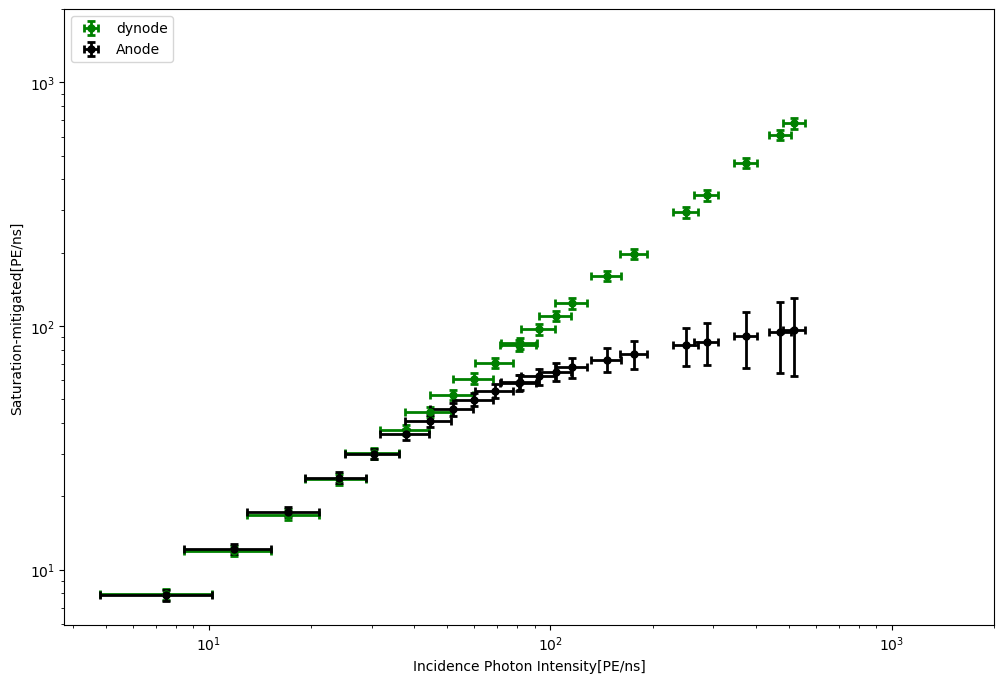

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_filter_PEns_filter_0924,   df_filter_PEns_dynode_0924,     xerr=df_filter_PEns_filter_0924_err,   yerr=df_filter_PEns_dynode_0924_err,   fmt='.', markersize=10, ecolor='g', mfc='g', mec='g', alpha=1, capsize=3, elinewidth=2, capthick=2, label='dynode')
ax.errorbar(df_filter_PEns_filter_0924,   df_filter_PEns_Ch0_0924,        xerr=df_filter_PEns_filter_0924_err,   yerr=df_filter_PEns_dynode_0924_err,   fmt='.', markersize=10, ecolor='black', mfc='black', mec='black', alpha=1, capsize=3, elinewidth=2, capthick=2, label='Anode')
# ax.errorbar(df_filter_PEns_filter_1014,   df_filter_PEns_dynode_1014,     xerr=df_filter_PEns_dynode_1014,       yerr=df_filter_PEns_dynode_1014_err,   fmt='.', ecolor='c', mfc='c',mec='c',   alpha=1, capsize=3, elinewidth=2, capthick=2, label='dynode-1014')
# ax.errorbar(df_filter_PEns_filter_1014,   df_filter_PEns_Ch0_1014,        xerr=df_filter_PEns_filter_1014,       yerr=df_filter_PEns_Ch0_1014_err,      fmt='.', ecolor='b', mfc='b', mec='b',  capsize=3, elinewidth=2, capthick=2, label='Anode-1014')
# ax.errorbar(df_filter_PEns_filter_1014_1, df_filter_PEns_dynode_1014_1,   xerr=df_filter_PEns_filter_1014_1_err, yerr=df_filter_PEns_dynode_1014_1_err, fmt='.', ecolor='m', mfc='m', mec='m',   alpha=0.5,  capsize=3, elinewidth=2, capthick=2, label='dynode-1014-run2')
# ax.errorbar(df_filter_PEns_filter_1014_1, df_filter_PEns_Ch0_1014_1,      xerr=df_filter_PEns_filter_1014_1_err, yerr=df_filter_PEns_Ch0_1014_1_err,    fmt='.', markersize=10, ecolor='grey', mfc='grey', mec='grey',  capsize=3, elinewidth=2, capthick=2, label='LED-width-100ns-1us')
# ax.errorbar(df_filter_PEns_filter_1017,   df_filter_PEns_dynode_1017,     xerr=df_filter_PEns_filter_1017_err,   yerr=df_filter_PEns_dynode_1017_err,   fmt='.', ecolor='g', mfc='g', mec='g',  capsize=3, elinewidth=2, capthick=2, label='dynode-1017')
# ax.errorbar(df_filter_PEns_filter_1017,   df_filter_PEns_Ch0_1017,        xerr=df_filter_PEns_filter_1017_err,   yerr=df_filter_PEns_Ch0_1017_err,     fmt='.', ecolor='y', mfc='y', mec='y',  capsize=3, elinewidth=2, capthick=2, label='Anode-1017')
ax.set_ylabel('Saturation-mitigated[PE/ns]')
ax.set_xlabel('Incidence Photon Intensity[PE/ns]')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.axhline(y=45, color='grey', linestyle='--')
# ax.axvline(x=45, color='grey', linestyle='--') 
ax.legend(loc='upper left')
# ax.grid()
ax.set_xlim(-3e2, 2e3)
ax.set_ylim(-3e2, 2e3)
# ax.set_title('PMT-R8520-406 Saturation Evaluation')
plt.savefig(r'./figs/PMT_R8520_406_saturation_evaluation_PEns_20241112.png',dpi=300)
plt.savefig(r'./figs/PMT_R8520_406_saturation_evaluation_PEns_20241112.pdf',dpi=300)
plt.savefig(r'./figs/R8520_406_saturation_eval_PEns.pdf',dpi=300)
plt.savefig(r'./figs/R8520_406_saturation_eval_PEns.png',dpi=300)
plt.show()

In [102]:
df_filter_PEns_filter_0924[:7], df_filter_PEns_Ch0_0924[:7]
df_0924.file_tag[:7]

8     20240924_950mv_900mv_100ns_attenuator_9DB
6     20240924_965mv_900mv_100ns_attenuator_9DB
7     20240924_980mv_900mv_100ns_attenuator_9DB
9    20240924_1.000V_900mv_100ns_attenuator_9DB
5    20240924_1.010V_900mv_100ns_attenuator_9DB
4    20240924_1.020V_900mv_100ns_attenuator_9DB
3    20240924_1.030V_900mv_100ns_attenuator_9DB
Name: file_tag, dtype: object

# LED configuration vs PEns output

In [9]:
x_voltage=[1.300, 1.320, 1.325, 1.340, 1.350, 1.370, 1.390, 1.395, 1.400, 1.45, 1.50, 1.55, 1.6, 1.7, 1.8, 1.9, 2.4]
y_PEns = [0.048014, 0.262500,0.374222, 1.126540, 2.053110 , 6.643782,  17.555407, 20.948587,  23.818253, 88.080774, 233.040188, 430.848589, 920.932168,  1515.515502, 2168.399354,  2851.854953, 5401.832941]
y_PEns_err = [0.037515, 0.087182, 0.112307, 0.281535, 0.489081, 1.516262, 3.954439, 4.705566, 5.342463, 21.888568, 54.672104,  99.329265,  39.072124, 74.670152, 81.558482, 134.912989, 247.661942 ]
x_1us_voltage = [1.39, 1.42, 1.52, 1.7, 1.9]
y_1us_PEns = [207.136050, 420.341773, 720.832946, 1012.993925, 1620.341627]
y_1us_PEns_err = [1.204247, 2.015658, 3.108133, 4.008607, 6.447922]

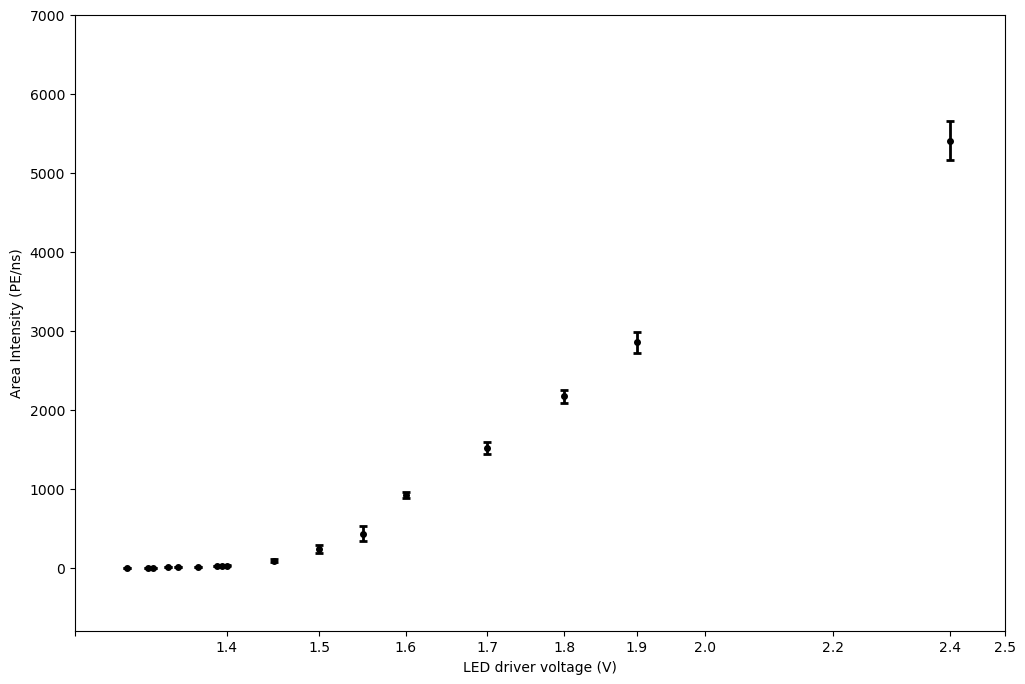

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(x_voltage, y_PEns, yerr=y_PEns_err, fmt='.', markersize=8, ecolor='black', mfc='black', mec='black',capsize=3, elinewidth=2, capthick=2, label='')
# ax.errorbar(x_1us_voltage, y_1us_PEns, yerr=y_1us_PEns_err, fmt='.',markersize=10, ecolor='grey', mfc='grey', mec='grey',alpha=1,capsize=3, elinewidth=2, capthick=2, label='')
# ax.plot(x_1us_voltage, y_1us_PEns, yerr=y_1us_PEns_err,  label=r'k={:.2f}, b={:.2f} '.format(k,b), color='r', alpha=1)
# ax.plot(x_tmp,  y_tmp, label=r'k={:.2f}, b={:.2f} '.format(k,b), color='r', alpha=1)
ax.set_xlabel('LED driver voltage (V)')
ax.set_ylabel('Area Intensity (PE/ns)')
ax.set_title('')
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.axhline(y=17., color='grey', linestyle='--', label='')
# ax.axvline(x=1.415, color='grey', linestyle='--', label='')
# ax.axvline(x=1.7, color='grey', linestyle='--', label='')
# ax.axvline(x=1.8, color='grey', linestyle='--', label='')
# ax.axvline(x=1.9, color='grey', linestyle='--', label='')
# ax.axvline(x=2.4, color='grey', linestyle='--', label='')
# ax.legend(loc='upper right')
ax.set_xlim(1.25, 2.2)
ax.set_ylim(-800, 7000)
ax.set_xticks([1.25, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.5])
ax.set_xticklabels(['', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2.0', '2.2', '2.4', '2.5'])
# ax.set_title('LED output configuration map')
plt.savefig(r'./figs/LED_output_configuration_map_20241113.png',dpi=300)
plt.savefig(r'./figs/LED_configure.pdf',dpi=300)
plt.show()

# Saturation time constant map

/tmp/ipykernel_979919/4202355158.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


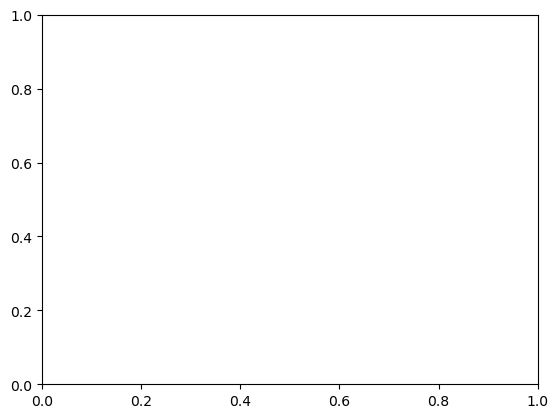

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap('tab10')  
fig, ax = plt.subplots() 
def plot_ratio(file, cmap_index, voltage):
    """plot waveform 
    parameter:
        df : scaled data with pandas DataFrame
        cmap_index: 0,1,2,3...
        voltage(str): '1p8v' LED driver voltage
    """ 
    df = pd.read_hdf(file, key='winfo')
    ax.errorbar(df.Delta_t, df.R2ref, yerr=df.R2ref_err, fmt='.',  color=cmap(cmap_index), alpha=0.3, markersize=8, capsize=3, elinewidth=2, capthick=2, label=r'{}'.format(voltage))      
    ax.set_xlabel('Delta_t [us]')  
    ax.set_ylabel('Surviving Factor')
    ax.set_title('')
    ax.set_xscale('log')
    ax.legend(loc='upper left')
    ax.set_xlim(-100, 100000)
    ax.set_ylim(0.8, 1.2)
    ax.legend()  

/tmp/ipykernel_979919/1379225525.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')
/tmp/ipykernel_979919/4202355158.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-100, 100000)
/tmp/ipykernel_979919/4202355158.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-100, 100000)
/tmp/ipykernel_979919/4202355158.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-100, 100000)
/tmp/ipykernel_979919/4202355158.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-100, 100000)
/tmp/ipykernel_979919/4202355158.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis w

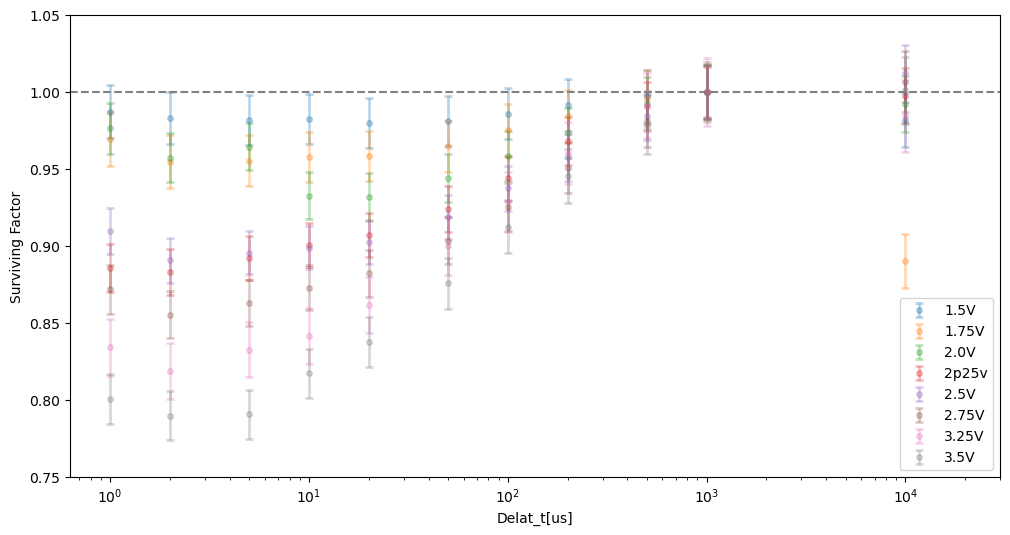

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('tab10')  
fig, ax = plt.subplots(figsize=(12, 6)) 
voltage_map = {'3p5v_1p75v':'3.5V','3v_1p5v':'3.0V','2p5v_1p25v':'2.5V','2v_1v':'2.0V','1p5v_750mv':'1.5V',
               '3p25v_1p625v':'3.25V', '2p75v_1p375v':'2.75V','2p25v_1p125v':'2p25v','1p75v_875mv':'1.75V' }
# file_list = 'runlist/scale_file_list'
file_list = 'runlist/scale_file_list_scaled'
i = 0
with open(file_list, 'r') as list:
    for line in list: 
        file = line.rstrip('\n')
        voltage_tag = file.split('combine_')[1].split('_1p36v_')[0]
        plot_ratio(file, i, voltage_map.get(voltage_tag))    
        i += 1
        
ax.set_xlabel('Delat_t[us]')
ax.set_ylabel('Surviving Factor')   
ax.axhline(y=1.0, color='grey', linestyle='--', label='')
# ax.set_title(title)
ax.set_ylim(0.75,1.05)
ax.set_xlim(-1.E3,3.E4)
plt.legend(loc='lower right')    
# print(save_path)
save_path = 'figs/surviving_factor.png'
plt.savefig(save_path,dpi=300)
plt.show()